In [1]:
#导入包(PypI)
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates#导入日期刻度格式化工具

In [2]:
#加载数据
path="D:/学习教育/数据可视化/大作业/Lifetime and Recent Players Count History/"
os.chdir(path)
files = ["Lifetime players count history-Goose Goose Duck.csv", "Recent players count history-Goose Goose Duck.csv"]
def load_data(file):
    df = pd.read_csv(file, encoding='utf-8')
    x = pd.to_datetime(df['DateTime'])
    y = df['Players']
    return x, y
data_dict = {}
for i, file_name in enumerate(files):
    x, y = load_data(file_name)
    var_name = f'x{i+1},y{i+1}'
    data_dict[var_name] = (x, y)
data_dict

{'x1,y1': (0     2021-04-29
  1     2021-04-30
  2     2021-05-01
  3     2021-05-02
  4     2021-05-03
           ...    
  731   2023-04-30
  732   2023-05-01
  733   2023-05-02
  734   2023-05-03
  735   2023-05-04
  Name: DateTime, Length: 736, dtype: datetime64[ns],
  0         53
  1        125
  2        279
  3        232
  4        203
         ...  
  731    50981
  732    48971
  733    51247
  734    50670
  735     5161
  Name: Players, Length: 736, dtype: int64),
 'x2,y2': (0      2023-04-20 04:00:00
  1      2023-04-20 04:10:00
  2      2023-04-20 04:20:00
  3      2023-04-20 04:30:00
  4      2023-04-20 04:40:00
                 ...        
  2011   2023-05-04 03:10:00
  2012   2023-05-04 03:20:00
  2013   2023-05-04 03:30:00
  2014   2023-05-04 03:40:00
  2015   2023-05-04 03:50:00
  Name: DateTime, Length: 2016, dtype: datetime64[ns],
  0       7164.0
  1       7410.0
  2       7870.0
  3       8199.0
  4       8497.0
           ...  
  2011    4702.0
  2012    4791.0

In [3]:
date_fmt = mdates.DateFormatter('%m-%d')#设置日期刻度格式化器

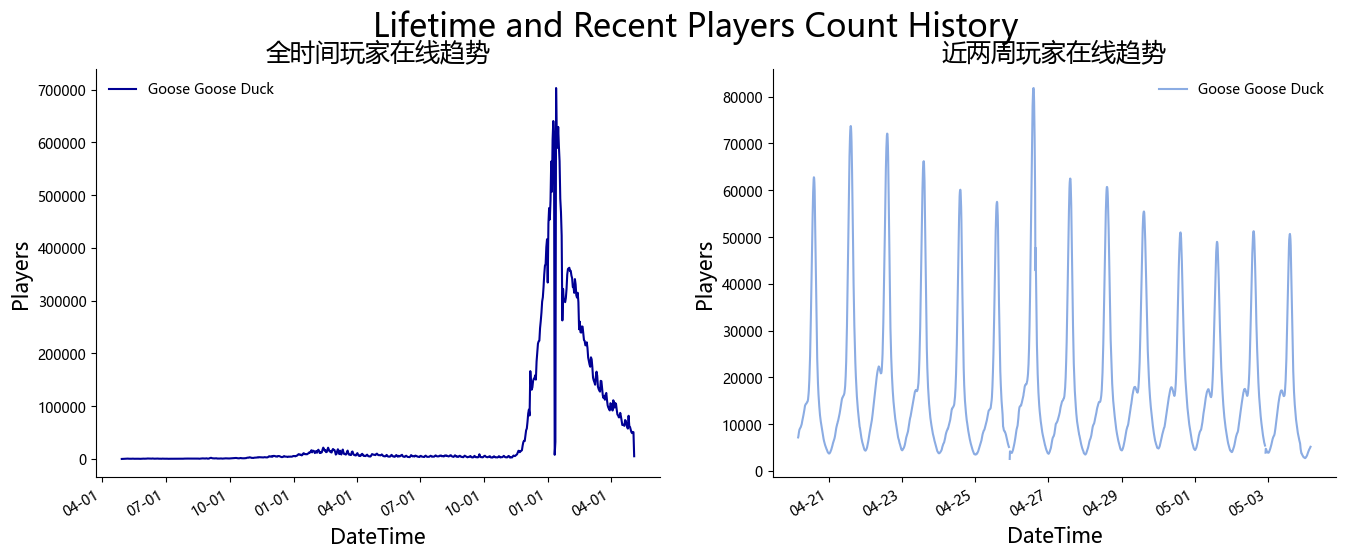

In [4]:
#绘制折线图：全时间和近两周玩家在线趋势
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
plt.rcParams['axes.unicode_minus'] = False
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
for i in range(2):
    xy_key = f"x{i+1},y{i+1}"
    if i == 0:
        axs[i].plot(data_dict[xy_key][0], data_dict[xy_key][1], color='#000094', label='Goose Goose Duck')
        axs[i].set_title('全时间玩家在线趋势', size=18)
    elif i == 1:
        axs[i].plot(data_dict[xy_key][0], data_dict[xy_key][1], color='#8BACE3', label='Goose Goose Duck')
        axs[i].set_title('近两周玩家在线趋势', size=18)
    axs[i].set_xlabel('DateTime', size=15)
    axs[i].set_ylabel('Players', size=15)
    axs[i].xaxis.set_major_formatter(date_fmt)
    axs[i].legend(frameon=False)
    axs[i].spines['right'].set_color('none')
    axs[i].spines['top'].set_color('none')
    fig.autofmt_xdate()
plt.suptitle('Lifetime and Recent Players Count History', fontsize=23)
plt.savefig('折线图(缩放)-Lifetime and Recent Players Count History.png')
plt.show()